In [1]:
func1 = lambda x: x + 1
func2 = lambda x: x + 2
func3 = lambda x: x + 3

func_list = [func1, func2, func3]

In [2]:
def new_func(func_list):
    res = lambda x: sum(f(x) for f in func_list)
    return res

In [3]:
nf = new_func(func_list)

((30, 1), (30, 1), (30, 1), (30, 1))

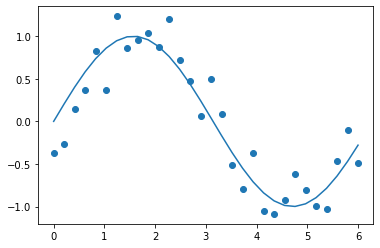

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-0, 6, 30).reshape(-1, 1)
y = np.sin(X).reshape(-1, 1)
noise = np.array([np.random.random() for i in range(0, len(y))]).reshape(-1, 1)*1 - 0.5
y_noise = y + noise

noise
plt.plot(X, y)
plt.scatter(X, y_noise)
X.shape, y.shape, noise.shape, y_noise.shape

In [5]:
def get_s(alg_predict, y):
    s = -2*(alg_predict - y)
    s = s.reshape(-1, 1)

    return s

def get_algo_predict(algo_list,ind, X):
    end = ind
    res = sum(algo_list[i].predict(X) for i in range(0, end))
    res  = res.reshape(-1, 1)
    return res

def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

In [6]:
from sklearn.tree import DecisionTreeRegressor

num_algorithms = 100
max_depth = 5
base_algorithms_list = []
coefficients_list = np.ones(num_algorithms)


# create the base tree
tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
tree.fit(X, y_noise)
base_algorithms_list.append(tree)

# let's teacj each tree to get the difficult algo
for i in range(1, num_algorithms+1):    
    predict = get_algo_predict(base_algorithms_list, i, X)
    s = get_s(predict, y_noise)
    # print(predict.shape)
    tree = DecisionTreeRegressor(max_depth = max_depth, random_state = 42).fit(X, s)
    base_algorithms_list.append(tree)

X_test = np.linspace(0, 6, 1000).reshape(-1, 1)
X_test.reshape(-1, 1)
X_test.shape
predict = get_algo_predict(base_algorithms_list, 51, X_test)
X.shape, X_test.shape

((30, 1), (1000, 1))

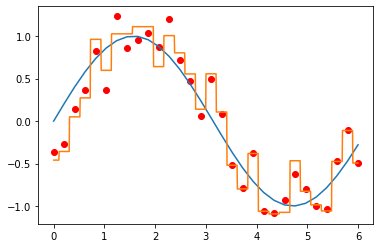

In [7]:
plt.plot(X, y)
plt.scatter(X, y_noise, c='red')
plt.plot(X_test, predict)

In [33]:
def get_s(alg, X, y):
    s = -2*(alg(X) - y)
    s.reshape(-1, 1)

    return s

def get_algo(algo_list,ind):
    resf = lambda x: sum(algo_list[i].predict(x).reshape(-1, 1) for i in range(0, ind))
    return resf

def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

In [57]:
from sklearn.tree import DecisionTreeRegressor

num_algorithms = 50
max_depth = 5
base_algorithms_list = []
coefficients_list = np.ones(num_algorithms)


# create the base tree
tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
tree.fit(X, y_noise)
base_algorithms_list.append(tree)

# teach base trees
for i in range(1, num_algorithms+1):      
    alg = get_algo(base_algorithms_list, i-1)
    s = get_s(alg, X, y_noise)
    tree = DecisionTreeRegressor(max_depth = 5, random_state = 42).fit(X, s)
    base_algorithms_list.append(tree)

X_test = np.linspace(0, 6, 1000).reshape(-1, 1)
predict = get_algo(base_algorithms_list, num_algorithms)(X_test)
X.shape, X_test.shape, predict.shape

((30, 1), (1000, 1), (1000, 1))

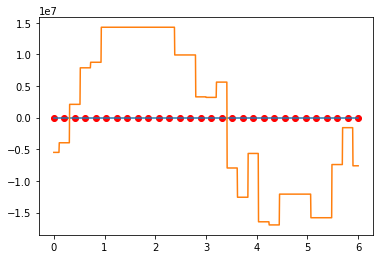

In [56]:
plt.plot(X, y)
plt.scatter(X, y_noise, c='red')
plt.plot(X_test, predict)

In [43]:
# create the base tree
tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
tree.fit(X, y_noise)
base_algorithms_list.append(tree)

# teach base trees
alg = get_algo(base_algorithms_list, 1) 
s = get_s(alg, X, y_noise)
tree = DecisionTreeRegressor(max_depth = 5, random_state = 42).fit(X, s)
base_algorithms_list.append(tree)

alg = get_algo(base_algorithms_list, 2)
predict = alg(X)


In [45]:
predict.shape

(30, 1)

In [58]:
l1  = list(range(0, 10))

In [60]:
l1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [62]:
l1 * 2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]